In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams.update({'font.size': 18})
sns.set(font_scale=3)

In [3]:
def plot_data_bar(df):
    df_melted = df.melt(id_vars='label', var_name='Parameter', value_name='Value')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Parameter', y='Value', hue='label', data=df_melted)
    plt.xlabel('')
    plt.ylabel('Values')
    # plt.legend(title='Sample Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.legend_.remove()
    plt.tight_layout()
    plt.show()

def get_legend(df):
    df_melted = df.melt(id_vars='label', var_name='Parameter', value_name='Value')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Parameter', y='Value', hue='label', data=df_melted)
    plt.xlabel('')
    plt.ylabel('Values')
    plt.legend(title='Sample Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Extract the legend handles and labels
    handles, labels = ax.get_legend_handles_labels()

    # Create a new figure for the legend
    fig_legend = plt.figure(figsize=(2, 2))
    legend = fig_legend.legend(handles, labels, loc='center')
    fig_legend.canvas.draw()

    # Remove the axes by adding a blank plot
    fig_legend.add_subplot(111).set_axis_off()

    plt.show()

In [4]:
from os import listdir
from os.path import isfile, join

# path = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/results/backprop1000/data_size"
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/results/backprop1000NewLossFunctionHeterFF/data_size"
files = [f for f in listdir(path) if isfile(join(path, f))]
files.sort()
files.pop(-1)
files

['log_method_val_100.log',
 'log_method_val_1000.log',
 'log_method_val_200.log',
 'log_method_val_300.log',
 'log_method_val_400.log',
 'log_method_val_5.log',
 'log_method_val_50.log',
 'log_method_val_500.log',
 'log_method_val_600.log',
 'log_method_val_700.log',
 'log_method_val_800.log']

In [5]:
def _sigmoid(value, steepness=1, scaling=1):
    return scaling / (1 + np.exp(-steepness * value))


params_to_J = lambda x: _sigmoid(x, 1, 40)
params_to_P = lambda x: _sigmoid(x, 1, 0.6)
params_to_w = lambda x: _sigmoid(x, 1, 180)
params_to_q = lambda x: _sigmoid(x, 1, 1)


def mean_list_to_values(mean_list):
    return [params_to_J(mean_list[0]), params_to_J(mean_list[1]), params_to_J(mean_list[2]), params_to_J(mean_list[3]), 
            params_to_P(mean_list[4]), params_to_P(mean_list[5]), params_to_P(mean_list[6]), params_to_P(mean_list[7]), params_to_q(mean_list[8]),  
            params_to_w(mean_list[9]), params_to_w(mean_list[10]), params_to_w(mean_list[11]), params_to_w(mean_list[12])]

In [6]:
losses = []
sample_sizes = [5, 50, 100, 200, 300, 400, 500, 600, 1000]

for filename, size in zip(files, sample_sizes):
    loss = []
    with open(f"{path}/log_method_val_{size}.log", "r") as f:
        for line in f:
            words = line.split(" ")
            if words[0] == "loss:":
                loss.append(float(words[1]))
    losses.append(loss)

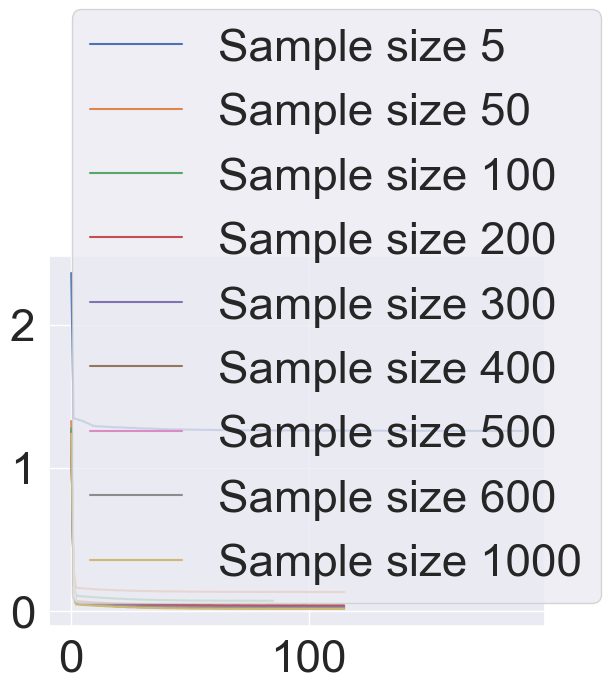

In [7]:
for loss, size in zip(losses, sample_sizes):
    plt.plot(loss, label=f"Sample size {size}")
# plt.ylim(0, 0.25)
# plt.xlim()
plt.legend()
plt.show()

In [8]:
# minimas_params = [[-3.218628, -3.933511, -1.174266, -1.234903, -2.659001, -1.518347, -0.969763, 0.708623, -2.323526, -1.665554, -0.817628, -0.183084],
#             [-3.221786, -3.932365, -1.172538, -1.239925, -2.66091, -1.517495, -0.967665, 0.707468, -2.325328, -1.664723, -0.82691, -0.180438],
#             [-3.188166, -3.943996, -1.129386, -1.27936, -2.627008, -1.527394, -0.930904, 0.680774, -2.289257, -1.676373, -0.82837, -0.185803],
#             [-3.219942, -3.932152, -1.170464, -1.242673, -2.659836, -1.51729, -0.96596, 0.706302, -2.324133, -1.664401, -0.839455, -0.17716],
#             [-3.201051, -3.93818, -1.150246, -1.262721, -2.641104, -1.522342, -0.948684, 0.692106, -2.305184, -1.670131, -0.826694, -0.184147],
#             [-3.20935, -3.938882, -1.161339, -1.248952, -2.647298, -1.523139, -0.958703, 0.700393, -2.31046, -1.67146, -0.829947, -0.181282],
#             [-3.203642, -3.933478, -1.140253, -1.273028, -2.641538, -1.518631, -0.940123, 0.685979, -2.304712, -1.66649, -0.824478, -0.186092],
#             [-3.206426, -3.937387, -1.155492, -1.256044, -2.64468, -1.521869, -0.953558, 0.696232, -2.308164, -1.669922, -0.834697, -0.180993],
#             [-3.204458, -3.937143, -1.152352, -1.260337, -2.643374, -1.521583, -0.950643, 0.693664, -2.306645, -1.66965, -0.830653, -0.182704],
#             [-3.206369, -3.937628, -1.156463, -1.25574, -2.644824, -1.52204, -0.954336, 0.696473, -2.308064, -1.67018, -0.83296, -0.181446],
#             [-3.206323, -3.937451, -1.155134, -1.25639, -2.644739, -1.521898, -0.953163, 0.69608, -2.307989, -1.67003, -0.834904, -0.180926]]
minimas_params = [[-2.686032, -2.496744, 0.296895, -0.635452, -2.728343, -0.136239, -0.141572, 1.052535, -0.336367, -1.827994, -2.042766, -0.726707, -0.391795],
                  [-2.867556, -2.151913, 0.363422, 0.149724, -2.884227, 0.124623, -0.074956, 1.380034, -0.441942, -1.883824, -2.333443, -0.748202, -0.186149],
                  [-2.85837, -2.084727, 0.286045, 0.203446, -2.870855, 0.157189, -0.171097, 1.406098, -0.525809, -1.879842, -2.27083, -0.787635, -0.176526],
                  # [-2.87776, -2.129372, 0.324454, 0.196431, -2.893645, 0.13703, -0.122788, 1.402294, -0.455686, -1.887069, -2.321444, -0.761435, -0.178953],
                  # [-2.87872, -2.133984, 0.289029, 0.225684, -2.896172, 0.135022, -0.164689, 1.417668, -0.473785, -1.887615, -2.326862, -0.771777, -0.174798],
                  # [-2.880597, -2.135725, 0.270846, 0.241899, -2.898747, 0.13441, -0.186458, 1.425998, -0.476116, -1.888313, -2.329769, -0.775797, -0.172852],
                  [-2.876834, -2.13929, 0.289339, 0.223007, -2.89474, 0.132191, -0.164329, 1.416438, -0.469929, -1.887036, -2.330195, -0.770444, -0.175707],
                #   [-2.884695, -2.132276, 0.276827, 0.241123, -2.9023, 0.136474, -0.179185, 1.425392, -0.471974, -1.889582, -2.329069, -0.774013, -0.172579],
                  [-2.892232, -2.124759, 0.272432, 0.251684, -2.909178, 0.140898, -0.184357, 1.430499, -0.468398, -1.891978, -2.326946, -0.774498, -0.170724]]

minimas_values = []
for minimas in minimas_params:
    minimas_values.append(mean_list_to_values(minimas))

In [9]:

data = {
    "$J_{EE}$" : [11.31],
    "$J_{EI}$" : [4.52],
    "$J_{IE}$" : [16.97],
    "$J_{II}$" : [5.66],
    
    "$P_{EE}$" : [0.11],
    "$P_{EI}$" : [0.45],
    "$P_{IE}$" : [0.11],
    "$P_{II}$" : [0.45],

    "$w_{EE}$" : [32],
    "$w_{EI}$" : [32],
    "$w_{IE}$" : [32],
    "$w_{II}$" : [32],
    
    "$q_{ff}$" : [0.2],

    "label": ["Ground Truth", 5, 50, 100, 500, 1000] 
}
for minima in minimas_values:
    data["$J_{EE}$"].append(minima[0])
    data["$J_{EI}$"].append(minima[1])
    data["$J_{IE}$"].append(minima[2])
    data["$J_{II}$"].append(minima[3])
    data["$P_{EE}$"].append(minima[4])
    data["$P_{EI}$"].append(minima[5])
    data["$P_{IE}$"].append(minima[6])
    data["$P_{II}$"].append(minima[7])
    data["$q_{ff}$"].append(minima[8])
    data["$w_{EE}$"].append(minima[9])
    data["$w_{EI}$"].append(minima[10])
    data["$w_{IE}$"].append(minima[11])
    data["$w_{II}$"].append(minima[12])

In [10]:
df = pd.DataFrame(data)
df.head()

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,label
0,11.310000,4.520000,16.970000,5.660000,0.110000,0.450000,0.110000,0.450000,32.000000,32.000000,32.000000,32.000000,0.200000,Ground Truth
1,2.552105,3.043470,22.947332,13.851014,0.036793,0.279596,0.278800,0.444757,24.925935,20.661368,58.665198,72.591348,0.416692,5
2,2.151236,4.166104,23.594742,21.494449,0.031763,0.318669,0.288762,0.479398,23.751046,15.910351,57.818376,81.647400,0.391278,50
3,2.170011,4.423607,22.841104,22.027472,0.032168,0.323530,0.274398,0.481890,23.833264,16.842203,56.281807,82.076894,0.371495,100
4,2.132428,4.213451,22.873372,22.220874,0.031449,0.319800,0.275406,0.482868,23.684903,15.957523,56.948952,82.113465,0.384633,500


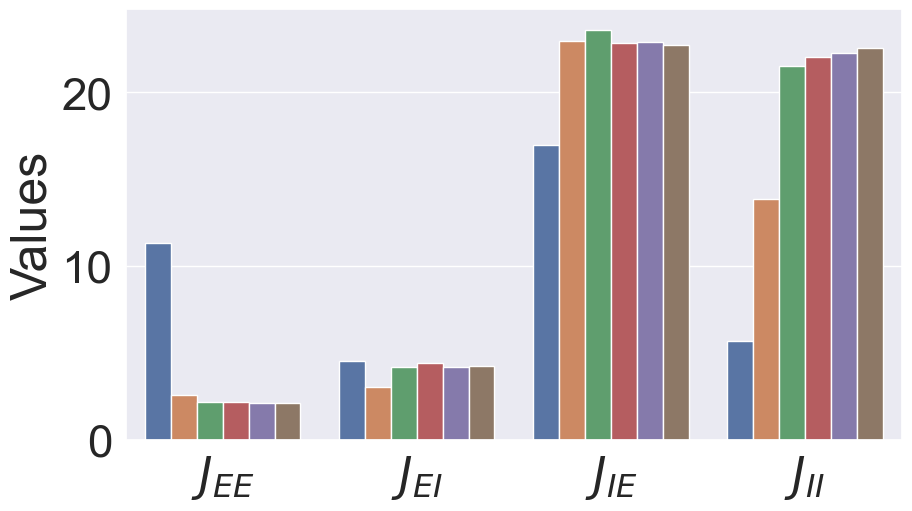

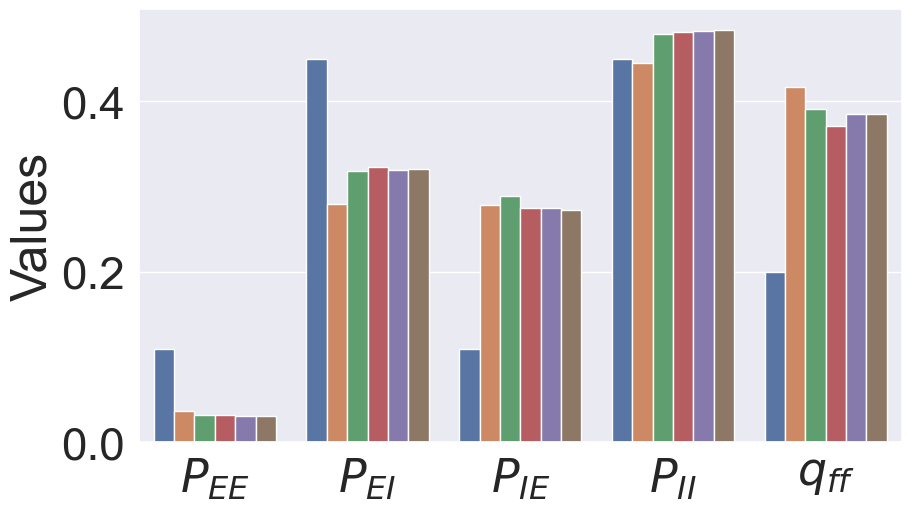

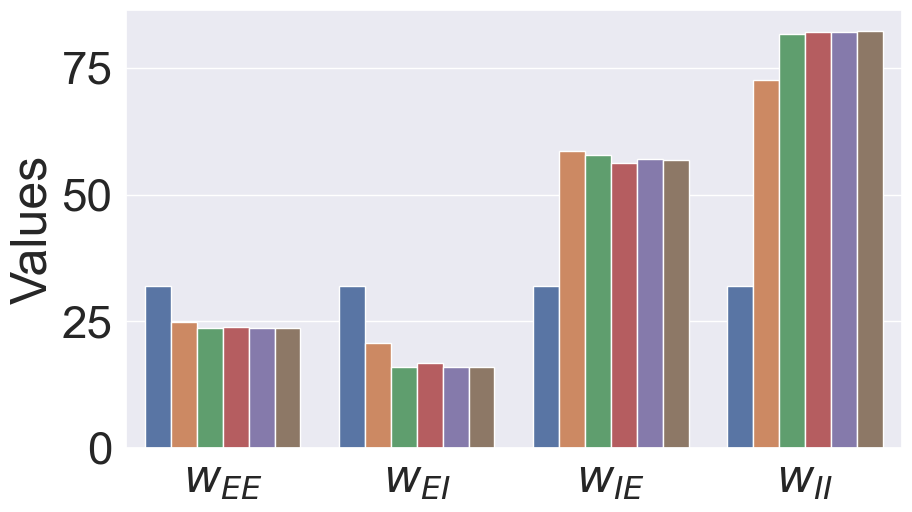

In [11]:
plot_data_bar(df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$", "label"]])
plot_data_bar(df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$", "label"]])
plot_data_bar(df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$", "label"]])

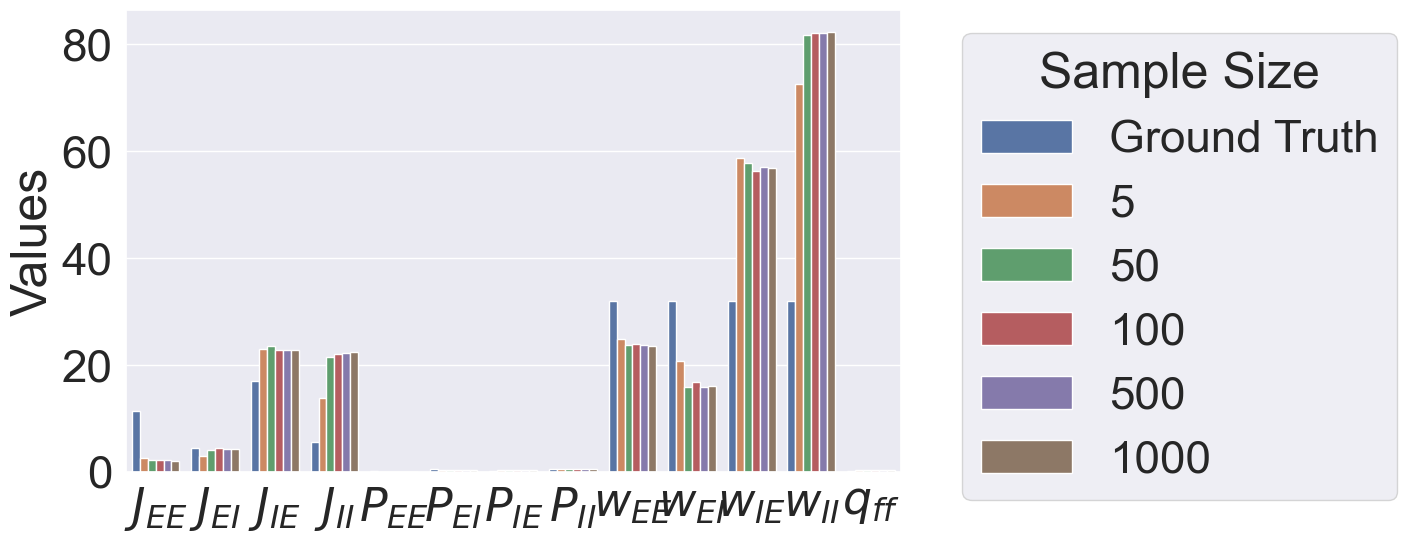

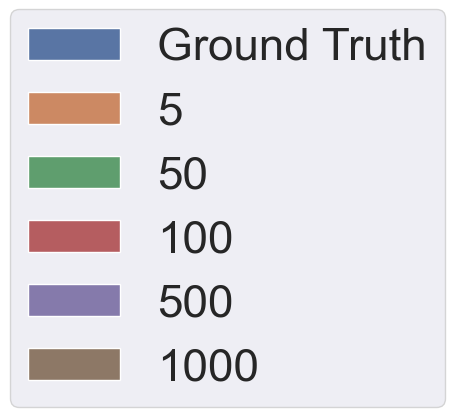

In [12]:
get_legend(df)

In [13]:
minimas_params = [[-2.686032, -2.496744, 0.296895, -0.635452, -2.728343, -0.136239, -0.141572, 1.052535, -0.336367, -1.827994, -2.042766, -0.726707, -0.391795],
                  [-2.867556, -2.151913, 0.363422, 0.149724, -2.884227, 0.124623, -0.074956, 1.380034, -0.441942, -1.883824, -2.333443, -0.748202, -0.186149],
                  [-2.85837, -2.084727, 0.286045, 0.203446, -2.870855, 0.157189, -0.171097, 1.406098, -0.525809, -1.879842, -2.27083, -0.787635, -0.176526],
                  [-2.87776, -2.129372, 0.324454, 0.196431, -2.893645, 0.13703, -0.122788, 1.402294, -0.455686, -1.887069, -2.321444, -0.761435, -0.178953],
                  [-2.87872, -2.133984, 0.289029, 0.225684, -2.896172, 0.135022, -0.164689, 1.417668, -0.473785, -1.887615, -2.326862, -0.771777, -0.174798],
                  [-2.880597, -2.135725, 0.270846, 0.241899, -2.898747, 0.13441, -0.186458, 1.425998, -0.476116, -1.888313, -2.329769, -0.775797, -0.172852],
                  [-2.876834, -2.13929, 0.289339, 0.223007, -2.89474, 0.132191, -0.164329, 1.416438, -0.469929, -1.887036, -2.330195, -0.770444, -0.175707],
                  [-2.884695, -2.132276, 0.276827, 0.241123, -2.9023, 0.136474, -0.179185, 1.425392, -0.471974, -1.889582, -2.329069, -0.774013, -0.172579],
                  [-2.892232, -2.124759, 0.272432, 0.251684, -2.909178, 0.140898, -0.184357, 1.430499, -0.468398, -1.891978, -2.326946, -0.774498, -0.170724]]

minimas_values = []
for minimas in minimas_params:
    minimas_values.append(mean_list_to_values(minimas))

In [18]:
ground_truth = [11.31, 4.52, 16.97, 5.66, 0.11, 0.45, 0.11, 0.45, 0.2, 32, 32, 32, 32]

data = {
    "$J_{EE}$" : [],
    "$J_{EI}$" : [],
    "$J_{IE}$" : [],
    "$J_{II}$" : [],
    
    "$P_{EE}$" : [],
    "$P_{EI}$" : [],
    "$P_{IE}$" : [],
    "$P_{II}$" : [],

    "$w_{EE}$" : [],
    "$w_{EI}$" : [],
    "$w_{IE}$" : [],
    "$w_{II}$" : [],
    
    "$q_{ff}$" : [],

    "label": [5, 50, 100, 200, 300, 400, 500, 600, 1000]
}

for minima in minimas_values:
    data["$J_{EE}$"].append(abs(minima[0] - ground_truth[0]))
    data["$J_{EI}$"].append(abs(minima[1] - ground_truth[1]))
    data["$J_{IE}$"].append(abs(minima[2] - ground_truth[2]))
    data["$J_{II}$"].append(abs(minima[3] - ground_truth[3]))
    data["$P_{EE}$"].append(abs(minima[4] - ground_truth[4]))
    data["$P_{EI}$"].append(abs(minima[5] - ground_truth[5]))
    data["$P_{IE}$"].append(abs(minima[6] - ground_truth[6]))
    data["$P_{II}$"].append(abs(minima[7] - ground_truth[7]))
    data["$q_{ff}$"].append(abs(minima[8] - ground_truth[8]))
    data["$w_{EE}$"].append(abs(minima[9] - ground_truth[9]))
    data["$w_{EI}$"].append(abs(minima[10] - ground_truth[10]))
    data["$w_{IE}$"].append(abs(minima[11] - ground_truth[11]))
    data["$w_{II}$"].append(abs(minima[12] - ground_truth[12]))

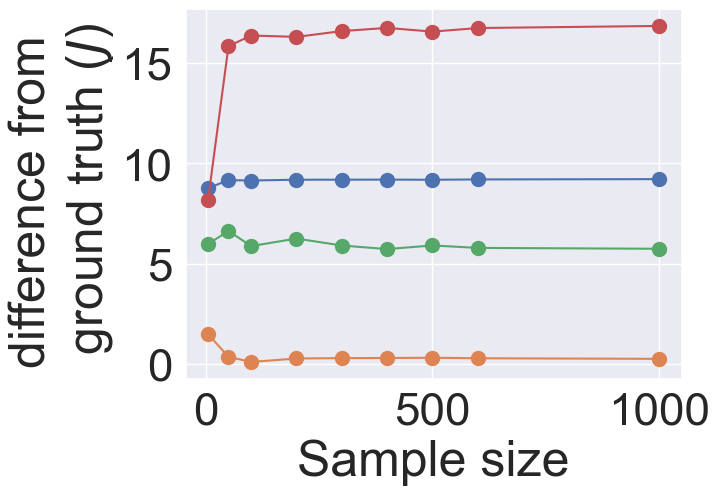

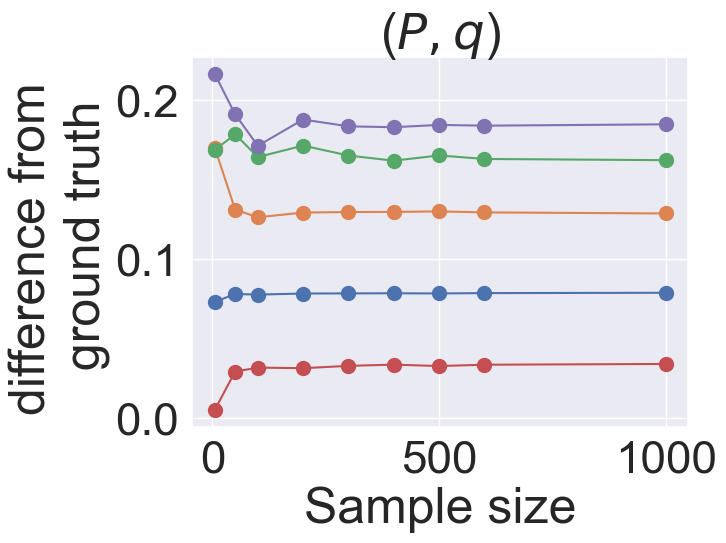

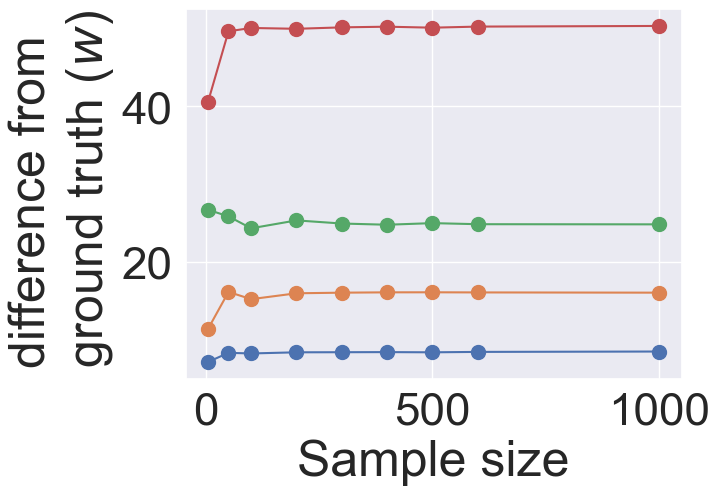

In [23]:
plt.plot(data["label"], data["$J_{EE}$"], marker=".", ms=20)
plt.plot(data["label"], data["$J_{EI}$"], marker=".", ms=20)
plt.plot(data["label"], data["$J_{IE}$"], marker=".", ms=20)
plt.plot(data["label"], data["$J_{II}$"], marker=".", ms=20)
plt.xlabel("Sample size")
plt.ylabel("difference from \n ground truth")
plt.title("($J$)")
plt.show()
plt.plot(data["label"], data["$P_{EE}$"], marker=".", ms=20)
plt.plot(data["label"], data["$P_{EI}$"], marker=".", ms=20)
plt.plot(data["label"], data["$P_{IE}$"], marker=".", ms=20)
plt.plot(data["label"], data["$P_{II}$"], marker=".", ms=20)
plt.plot(data["label"], data["$q_{ff}$"], marker=".", ms=20)
plt.xlabel("Sample size")
plt.ylabel("difference from \n ground truth")
plt.title("($P, q$)")
plt.show()
plt.plot(data["label"], data["$w_{EE}$"], marker=".", ms=20)
plt.plot(data["label"], data["$w_{EI}$"], marker=".", ms=20)
plt.plot(data["label"], data["$w_{IE}$"], marker=".", ms=20)
plt.plot(data["label"], data["$w_{II}$"], marker=".", ms=20)
plt.xlabel("Sample size")
plt.ylabel("difference from \n ground truth")
plt.title("($w$)")
plt.show()

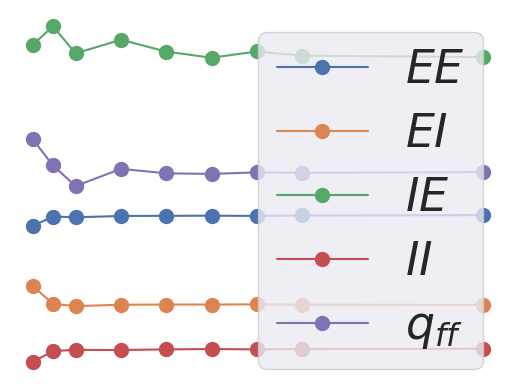

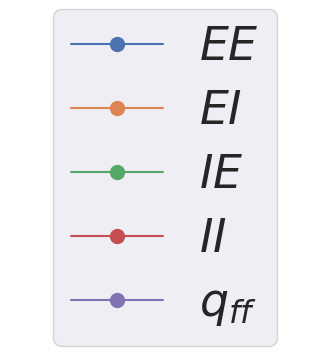

In [16]:
fig, ax = plt.subplots()

# Assuming your existing plotting code to define the labels
ax.plot(data["label"], data["$P_{EE}$"], marker=".", ms=20, label="${EE}$")
ax.plot(data["label"], data["$P_{EI}$"], marker=".", ms=20, label="${EI}$")
ax.plot(data["label"], data["$P_{IE}$"], marker=".", ms=20, label="${IE}$")
ax.plot(data["label"], data["$P_{II}$"], marker=".", ms=20, label="${II}$")
ax.plot(data["label"], data["$q_{ff}$"], marker=".", ms=20, label="$q_{ff}$")

# Create a legend
legend = ax.legend()

# Hide the axes
ax.axis('off')

# Plot the legend separately
fig_legend = plt.figure(figsize=(4, 2))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center')
ax_legend.axis('off')

plt.show()
